## 1. Data Loading and Initial Inspection

The first step of the analysis involves loading the historical NIFTY-50 index data into the notebook.  
The dataset is read from a CSV file and inspected to understand its structure, column names, and sample values.  
This helps verify that the data has been loaded correctly before further preprocessing.


In [ ]:
import pandas as pd

df = pd.read_csv("nifty.csv")
print(df.head())


         Date      Price       Open       High        Low     Vol. Change %
0  12/31/2024  23,644.80  23,560.60  23,689.85  23,460.45  193.63M    0.00%
1  12/30/2024  23,644.90  23,796.90  23,915.35  23,599.30  364.93M   -0.71%
2  12/27/2024  23,813.40  23,801.40  23,938.85  23,800.60  176.82M    0.27%
3  12/26/2024  23,750.20  23,775.80  23,854.50  23,653.60  177.68M    0.10%
4  12/24/2024  23,727.65  23,769.10  23,867.65  23,685.15  177.66M   -0.11%


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')


## 2. Data Cleaning and Price Conversion

The price column contains comma-separated values, which are treated as strings by default.  
To enable numerical calculations, commas are removed and the values are converted into floating-point numbers.  
This step ensures the price data is suitable for mathematical operations.



In [ ]:
# Remove commas and convert Price to numeric
df['Price'] = df['Price'].str.replace(',', '')
df['Price'] = df['Price'].astype(float)

price = df['Price']


## 3. Computation of Daily Returns

Daily returns are calculated to measure the relative change in price from one day to the next.  
Returns are used instead of raw prices because they provide a standardized way to analyze market behavior and volatility.  
Any missing values created during this process are removed.


In [ ]:
df['Return'] = price.pct_change()
df = df.dropna()

print(df[['Date', 'Return']].head())


           Date    Return
2475 2015-01-02  0.013454
2474 2015-01-05 -0.002031
2473 2015-01-06 -0.029964
2472 2015-01-07 -0.003107
2471 2015-01-08  0.016354


## 5. Historical Price Trend of the NIFTY-50 Index

This plot shows the historical movement of the NIFTY-50 index from 2015 to 2024.  
It provides an overall view of long-term trends, market cycles, and major fluctuations in the index value.  
Visualizing the historical price trend helps contextualize the subsequent return analysis and highlights the inherent volatility of the market.


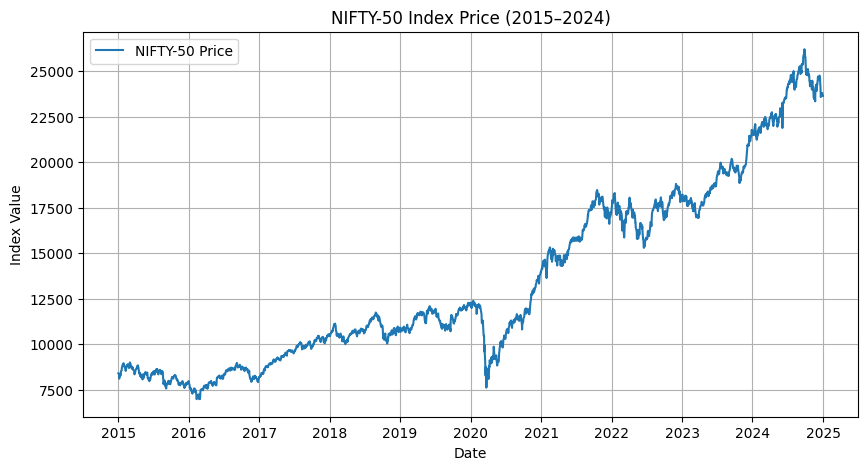

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Price'], label='NIFTY-50 Price')
plt.title("NIFTY-50 Index Price (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Index Value")
plt.legend()
plt.grid(True)
plt.show()


## 6. Log Returns Analysis

Log returns are plotted to analyze the day-to-day percentage changes in the NIFTY-50 index.  
This visualization highlights the random nature of market movements, periods of heightened volatility, and extreme return events.  
The presence of volatility clustering and sharp fluctuations justifies the use of stochastic modeling techniques such as Monte Carlo simulation.


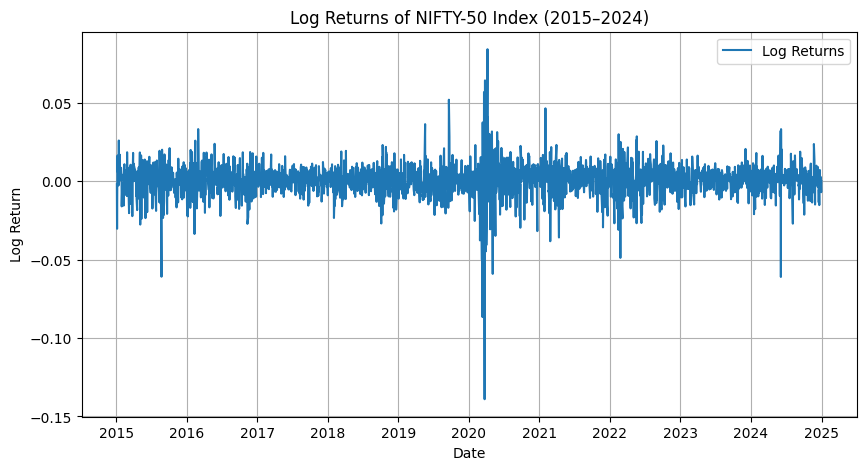

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df['Date'], df['Log_Return'], label='Log Returns')
plt.title("Log Returns of NIFTY-50 Index (2015–2024)")
plt.xlabel("Date")
plt.ylabel("Log Return")
plt.legend()
plt.grid(True)
plt.show()


## 7. Estimation of Return Statistics

The mean and standard deviation of daily returns are calculated to quantify the historical behavior of the NIFTY-50 index.  
The mean represents the average daily return, while the standard deviation captures the volatility of returns.  
These statistical parameters are essential inputs for the Monte Carlo simulation, as they define the expected return and uncertainty used to generate future price scenarios.


In [ ]:
mu = df['Return'].mean()
sigma = df['Return'].std()

print("Mean daily return:", mu)
print("Daily volatility:", sigma)


Mean daily return: 0.00047493528036190796
Daily volatility: 0.010452061972733902


## 8. Monte Carlo Simulation of Future NIFTY-50 Prices

In this step, Monte Carlo simulation is used to generate multiple possible future price outcomes for the NIFTY-50 index.  
The simulation is based on a stochastic price model that incorporates the historical mean return and volatility estimated earlier.

The last observed index value is taken as the initial price, and future prices are simulated over a one-year horizon (252 trading days).  
A total of 10,000 independent simulations are performed, where each simulation represents one possible future scenario under random market fluctuations.

This approach allows the analysis of uncertainty and risk by examining the distribution of all simulated future outcomes rather than relying on a single forecast.


In [ ]:
import numpy as np

S0 = price.iloc[-1]
T = 252
N = 10000

simulated_prices = np.zeros(N)

for i in range(N):
    simulated_prices[i] = S0 * np.exp(
        (mu - 0.5 * sigma**2) * T +
        sigma * np.sqrt(T) * np.random.normal()
    )

print(simulated_prices[:10])


[22231.48786035 25683.85392067 22543.12679451 23465.97929686
 21853.59008148 28640.23504854 28940.81063571 20505.34225714
 31673.08274244 26870.66148544]


## 9. Distribution of Simulated Future Prices

After generating multiple simulated future price outcomes, a histogram is used to visualize their distribution.  
The x-axis represents possible future NIFTY-50 index values, while the y-axis shows the frequency of simulated outcomes within each price range.

This visualization provides insight into the most likely future price levels, the spread of possible outcomes, and the presence of extreme values.  
It forms the basis for subsequent risk analysis by highlighting how uncertainty is distributed across different price ranges.


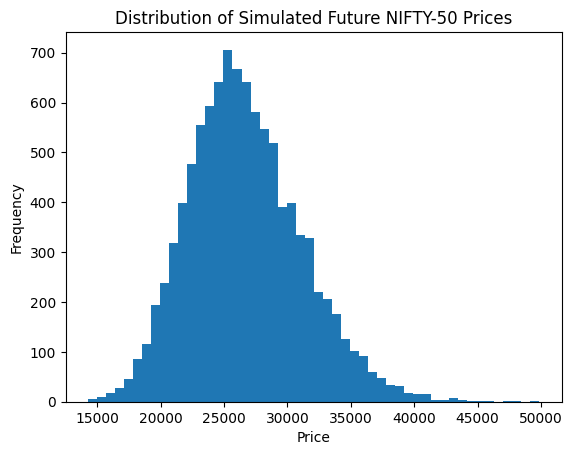

In [ ]:
import matplotlib.pyplot as plt

plt.hist(simulated_prices, bins=50)
plt.title("Distribution of Simulated Future NIFTY-50 Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


## 10. Risk Quantification Using Value at Risk (VaR) and Conditional Value at Risk (CVaR)

Value at Risk (VaR) is calculated to estimate the potential downside risk of the NIFTY-50 index at a specified confidence level.  
At the 5% confidence level, VaR represents the threshold below which the worst 5% of simulated price outcomes fall.

Conditional Value at Risk (CVaR) extends this concept by computing the average price outcome in scenarios where the loss exceeds the VaR threshold.  
Together, these metrics provide a quantitative assessment of extreme downside risk.


In [ ]:
confidence = 5

VaR = np.percentile(simulated_prices, confidence)
CVaR = simulated_prices[simulated_prices <= VaR].mean()

print("Value at Risk (5%):", VaR)
print("Conditional Value at Risk:", CVaR)


Value at Risk (5%): 19993.12354786764
Conditional Value at Risk: 18636.78317331164


## 11. Visualization of Monte Carlo Simulated Price Paths

To visually illustrate how the NIFTY-50 index may evolve over time, a subset of simulated price paths is plotted.  
Each line represents one possible future trajectory of the index over a one-year horizon, generated using the Monte Carlo simulation.

Only a limited number of paths are displayed to maintain clarity and interpretability, while the underlying simulation is based on a much larger number of scenarios.  
This visualization highlights the increasing dispersion of outcomes over time, reflecting growing uncertainty.


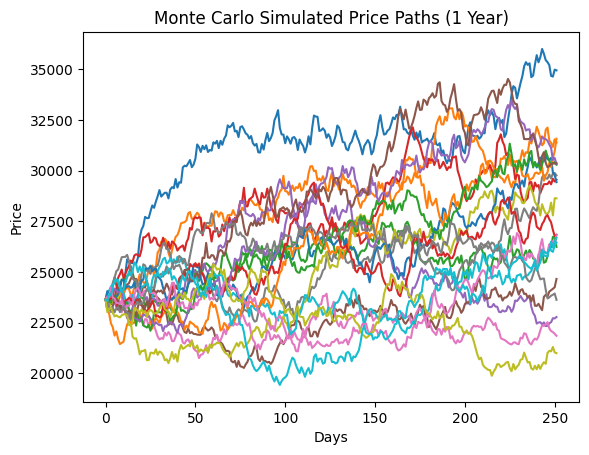

In [ ]:
num_paths = 20
paths = np.zeros((T, num_paths))
paths[0] = S0

for t in range(1, T):
    random_shock = np.random.normal(0, 1, num_paths)
    paths[t] = paths[t-1] * np.exp(
        (mu - 0.5 * sigma**2) +
        sigma * random_shock
    )

plt.plot(paths)
plt.title("Monte Carlo Simulated Price Paths (1 Year)")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


## 12. Visualization of Value at Risk on Simulated Price Distribution

To clearly interpret the downside risk, the Value at Risk (VaR) threshold is overlaid on the histogram of simulated future prices.  
The histogram represents the distribution of all simulated price outcomes, while the vertical dashed line indicates the VaR at the 5% confidence level.

This visualization highlights the boundary between typical market outcomes and extreme downside scenarios.  
It provides an intuitive understanding of how much of the distribution lies in the worst-case region defined by VaR.


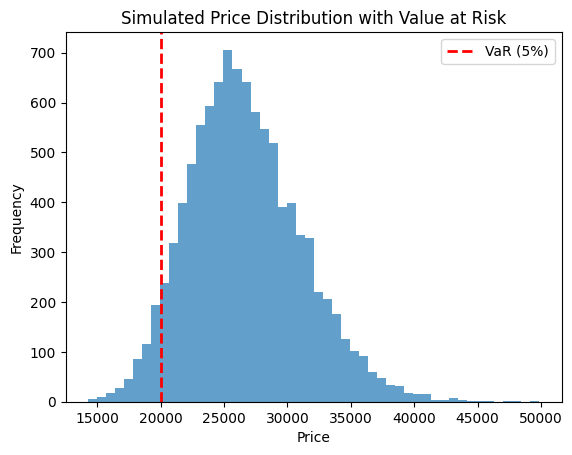

In [ ]:
plt.hist(simulated_prices, bins=50, alpha=0.7)
plt.axvline(VaR, color='red', linestyle='--', linewidth=2, label='VaR (5%)')
plt.title("Simulated Price Distribution with Value at Risk")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [ ]:
import numpy as np

df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))
df = df.dropna()


In [ ]:
p5  = np.percentile(simulated_prices, 5)
p50 = np.percentile(simulated_prices, 50)   # median
p95 = np.percentile(simulated_prices, 95)

print("5th percentile (lower bound):", p5)
print("Median outcome:", p50)
print("95th percentile (upper bound):", p95)


5th percentile (lower bound): 19993.12354786764
Median outcome: 26285.645760899453
95th percentile (upper bound): 34525.85920053715


## 13. Probabilistic Range of Simulated Future Prices

To further interpret the distribution of simulated outcomes, key percentiles are overlaid on the histogram of simulated prices.  
The 5th percentile represents a conservative lower bound, the median indicates the central tendency, and the 95th percentile reflects an optimistic upper bound.

Together, these percentile markers define a probabilistic range within which the majority of simulated future prices are expected to lie.  
This visualization provides a concise summary of uncertainty and complements the VaR-based risk analysis.


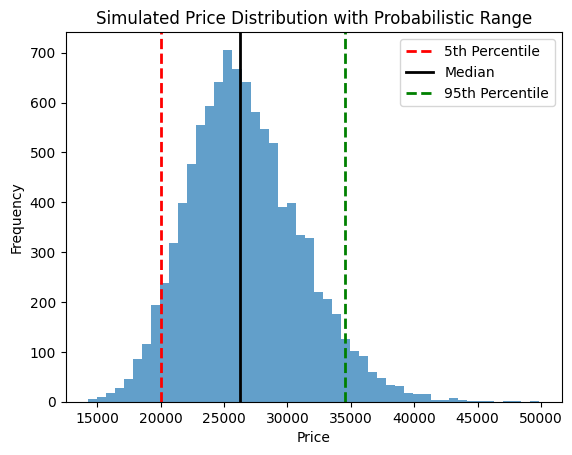

In [ ]:
plt.hist(simulated_prices, bins=50, alpha=0.7)

plt.axvline(p5,  color='red',   linestyle='--', linewidth=2, label='5th Percentile')
plt.axvline(p50, color='black', linestyle='-',  linewidth=2, label='Median')
plt.axvline(p95, color='green', linestyle='--', linewidth=2, label='95th Percentile')

plt.title("Simulated Price Distribution with Probabilistic Range")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.show()


## 14. Cumulative Distribution Function (CDF) of Simulated Prices

The cumulative distribution function (CDF) represents the probability that the simulated future price of the NIFTY-50 index will be less than or equal to a given value.  
Unlike a histogram, which shows frequency, the CDF provides a direct probabilistic interpretation of future outcomes.

This plot allows estimation of risk thresholds and price ranges by mapping probabilities to price levels.  
It is particularly useful for identifying percentile-based measures such as Value at Risk and understanding the overall uncertainty associated with future prices.


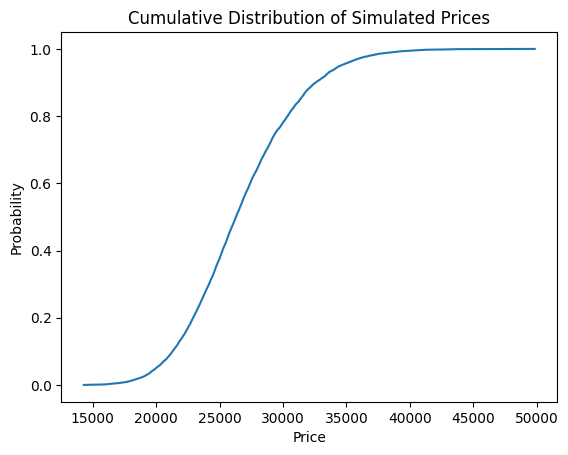

In [ ]:
sorted_prices = np.sort(simulated_prices)
cdf = np.arange(len(sorted_prices)) / len(sorted_prices)

plt.plot(sorted_prices, cdf)
plt.title("Cumulative Distribution of Simulated Prices")
plt.xlabel("Price")
plt.ylabel("Probability")
plt.show()


## 15. Evolution of Price Uncertainty Over Time

This visualization illustrates how the uncertainty in the NIFTY-50 index price evolves over time based on Monte Carlo simulations.  
For each simulated day, the median price path is plotted along with the 90% probabilistic range defined by the 5th and 95th percentiles.

The widening shaded region indicates increasing uncertainty as the forecast horizon extends.  
This plot demonstrates how risk accumulates over time and highlights the growing dispersion of possible outcomes in long-term market projections.


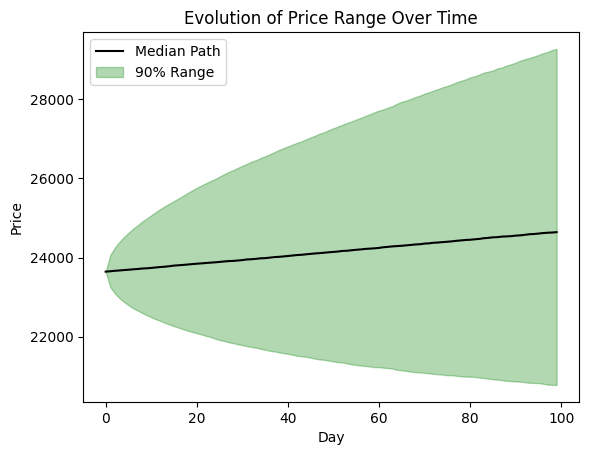

In [ ]:
lower = np.percentile(paths, 5, axis=1)
upper = np.percentile(paths, 95, axis=1)
median = np.percentile(paths, 50, axis=1)

plt.plot(median, color='black', label='Median Path')
plt.fill_between(range(len(median)), lower, upper,
                 color='green', alpha=0.3, label='90% Range')

plt.title("Evolution of Price Range Over Time")
plt.xlabel("Day")
plt.ylabel("Price")
plt.legend()
plt.show()
